<a href="https://colab.research.google.com/github/Hirithik-ds/Telecom-Customer-Churn-Prediction/blob/main/telecom_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Problem Statement:***

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the entire company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisition costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!


***Import Libratries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_Folder/Telcom Data (1).csv')

In [4]:
pd.set_option('display.max_columns', None)

***Overview of the Data***

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df['tenure'].value_counts()


,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [7]:
df.shape

(7043, 21)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***Data Cleaning***

In [10]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

***We could notice that roughly 26% of the individuals discontinues from the telecom service. In numbers, for every 100 customers, 26 consumers discontinue. This is quite awful for a telecom company, and they definitely need to take some action in their service.***

In [12]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


In [13]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [14]:
df['Churn'] = df['Churn'].replace({'Yes':1,'No':0})

In [15]:
df['Churn'].value_counts(normalize = True)

,proportion
Churn,
0,0.73463
1,0.26537


IMBALANCE IN THE TARGET

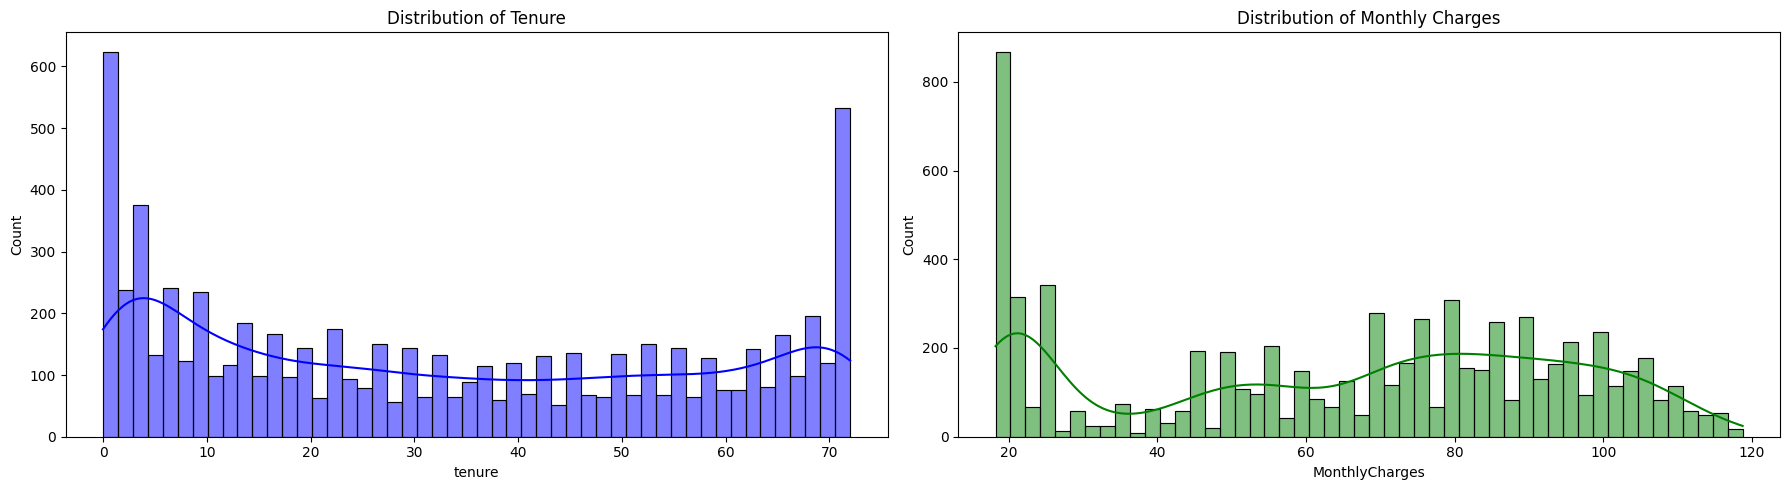

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(df['tenure'], bins=50, kde=True, color="blue", ax=axes[0])
axes[0].set_title('Distribution of Tenure')

sns.histplot(df['MonthlyCharges'], bins=50, kde=True, color="green", ax=axes[1])
axes[1].set_title('Distribution of Monthly Charges')


plt.tight_layout()
plt.show()

# Exploratory Data Analysis

***( Distribution of Tenure)***

-  High concentration of customers having very low tenure near zero. This suggests that many customers leave shortly after joining.

- There are some peaks at specific tenure points e.g., around 70+ months, possibly indicating long-term loyal customers.

- The presence of peaks at both low and high tenure values suggests two major customer groups:

- New customers who tend to churn early.

- Long-term subscribers who have stayed for extended periods.


***(Analysis of Monthly Charges Distribution)***

- Monthly charges exhibit a similar right-skewed distribution, meaning a significant number of customers are paying lower charges.

- A high concentration of customers is seen at the lower end 20, indicating a basic service plan that is widely chosen.

- The distribution gradually spreads towards higher charges 100, showing that some customers opt for premium services.

- The KDE suggests a gradual increase in density beyond the initial peak, indicating that while most customers pay low fees, a substantial portion is distributed across various pricing tiers.

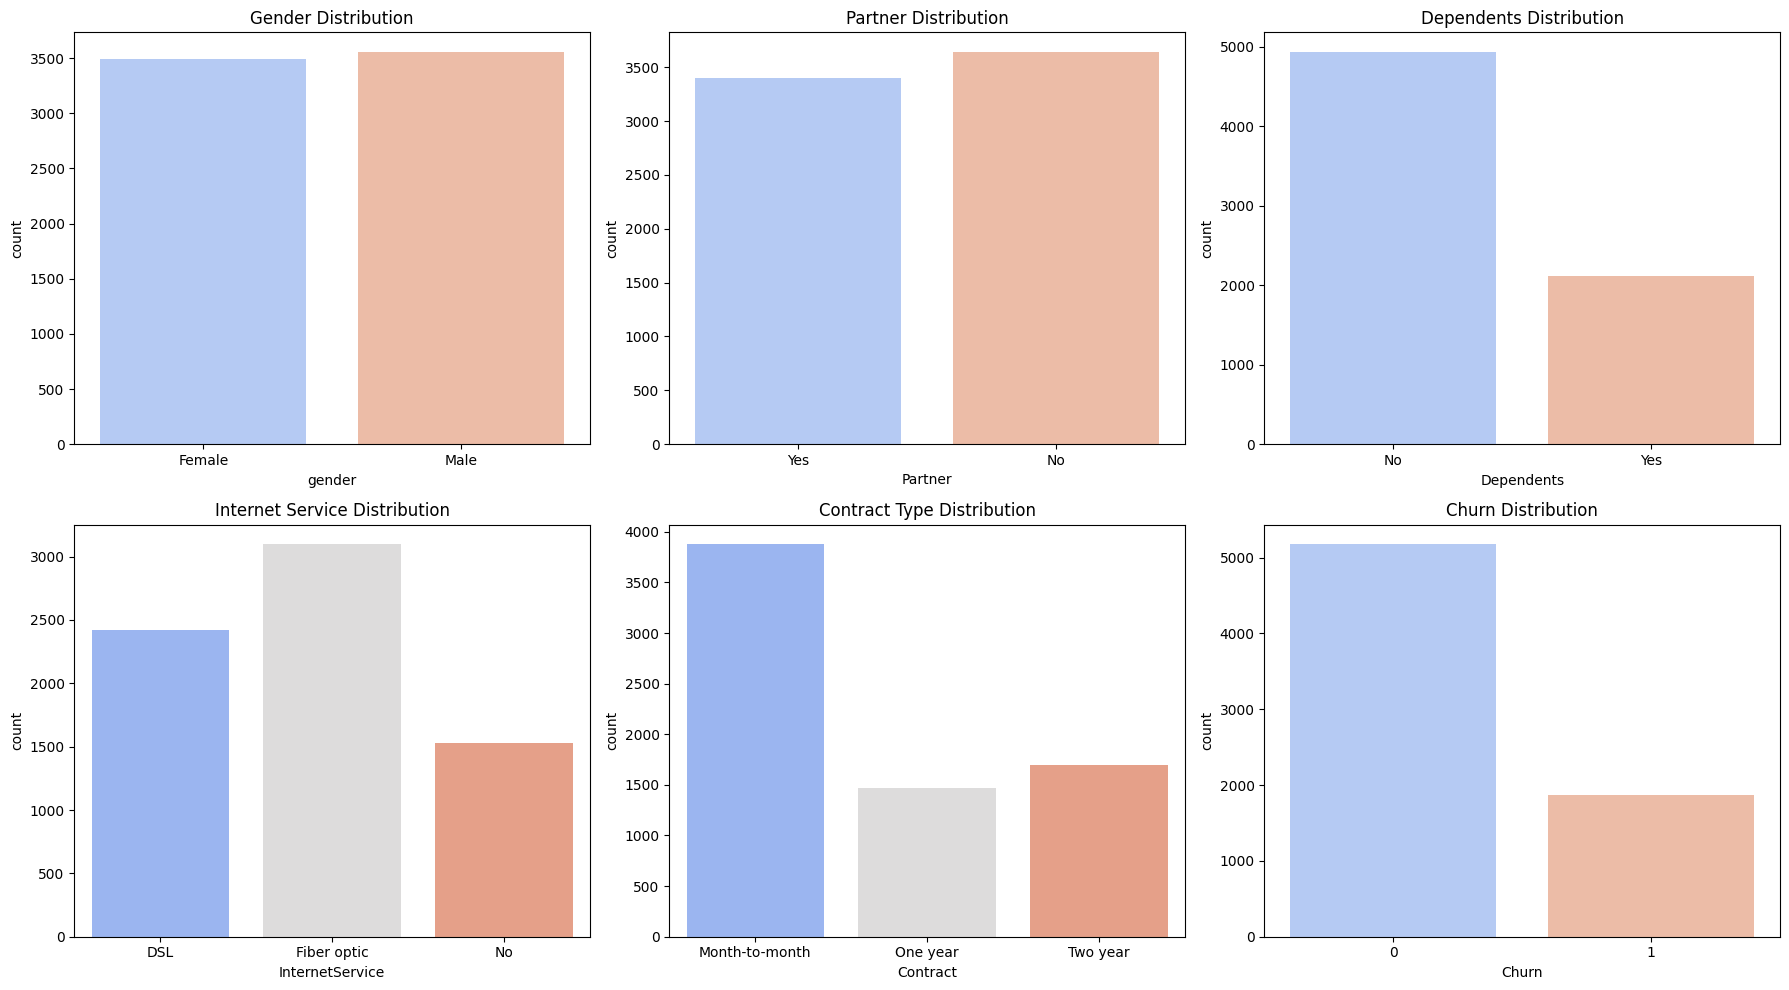

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x='gender', data=df, palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

sns.countplot(x='Partner', data=df, palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title('Partner Distribution')

sns.countplot(x='Dependents', data=df, palette="coolwarm", ax=axes[0, 2])
axes[0, 2].set_title('Dependents Distribution')

sns.countplot(x='InternetService', data=df, palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title('Internet Service Distribution')

sns.countplot(x='Contract', data=df, palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title('Contract Type Distribution')

sns.countplot(x='Churn', data=df, palette="coolwarm", ax=axes[1, 2])
axes[1, 2].set_title('Churn Distribution')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis (Part -2)

- Gender Distribution --> Male and Female contributes equally
- Internet Service Distribution ---> Fiber Optic Internet Service is the most used service among customers followed by DSL
-  Contract Type Distribution ---> Customers prefering Monthly Subscription over yearly Subscription

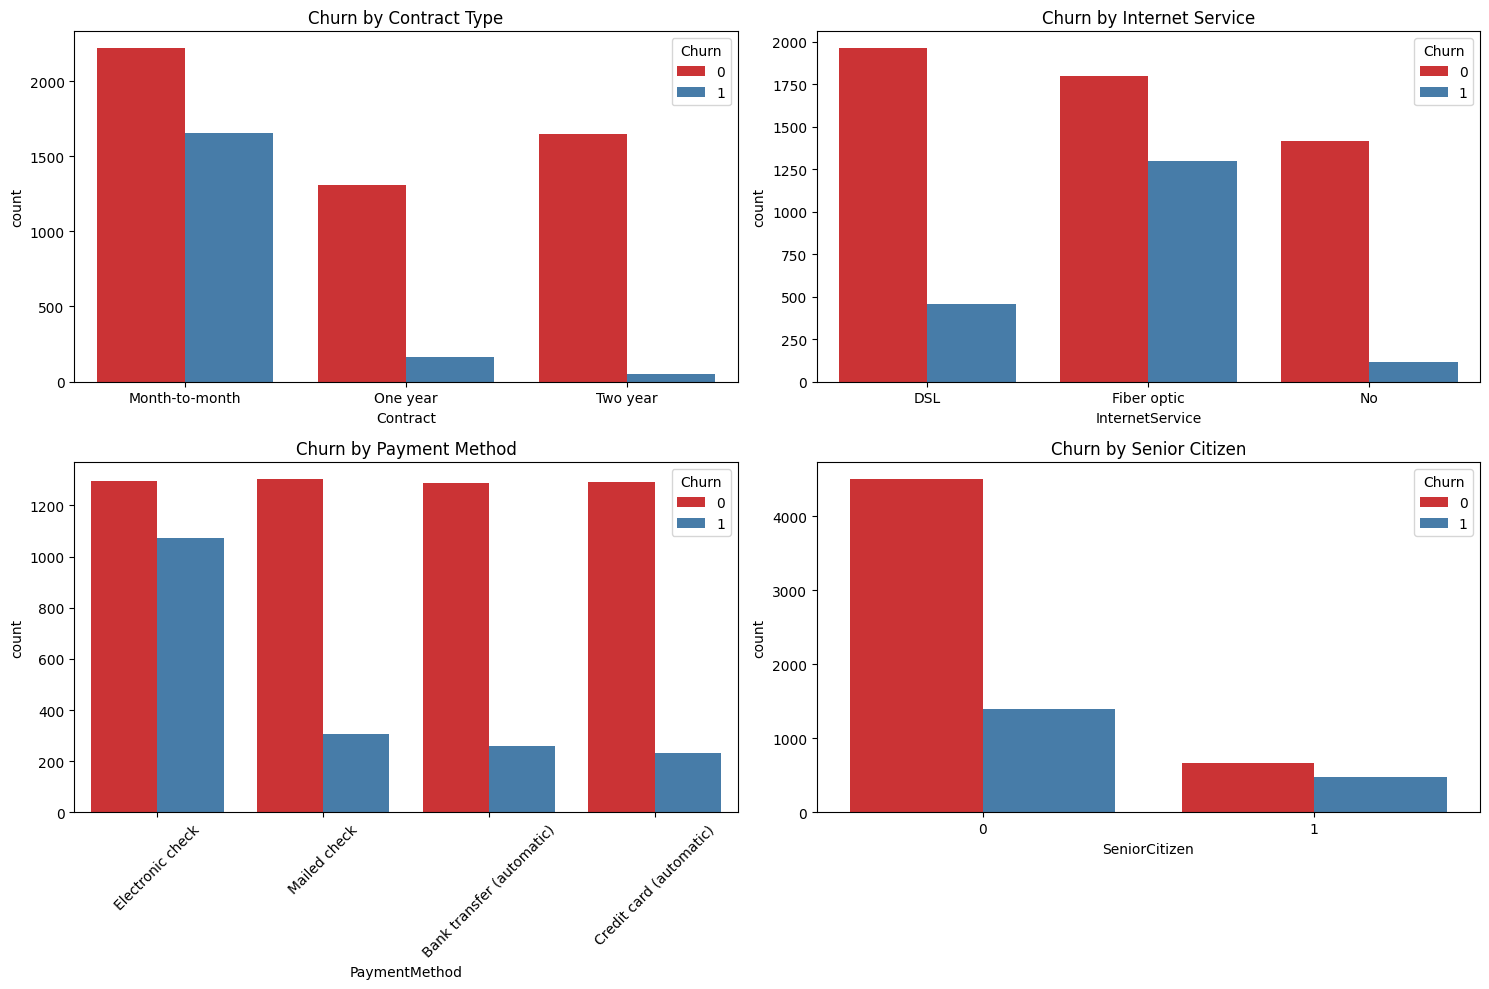

In [18]:
# Churn Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Contract', hue='Churn', data=df, palette="Set1", ax=axes[0, 0])
axes[0, 0].set_title('Churn by Contract Type')

sns.countplot(x='InternetService', hue='Churn', data=df, palette="Set1", ax=axes[0, 1])
axes[0, 1].set_title('Churn by Internet Service')

sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette="Set1", ax=axes[1, 0])
axes[1, 0].set_title('Churn by Payment Method')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette="Set1", ax=axes[1, 1])
axes[1, 1].set_title('Churn by Senior Citizen')

plt.tight_layout()
plt.show()

# Churn Analysis Summary

- **Contract Type:** Month-to-month contracts have the highest churn, while yearly and two-year contracts show significantly lower churn, indicating that longer commitments reduce customer attrition.

- **Internet Service:** Fiber optic users exhibit higher churn than DSL and those without internet, possibly due to pricing or service issues.

- **Payment Method:** Customers using electronic checks have the highest churn, suggesting that automatic payments (bank transfers, credit cards) lead to better retention.

- **Senior Citizens:** Older customers (Senior Citizen = 1) have a higher churn rate proportionally compared to younger customers, indicating a potential demographic risk factor.

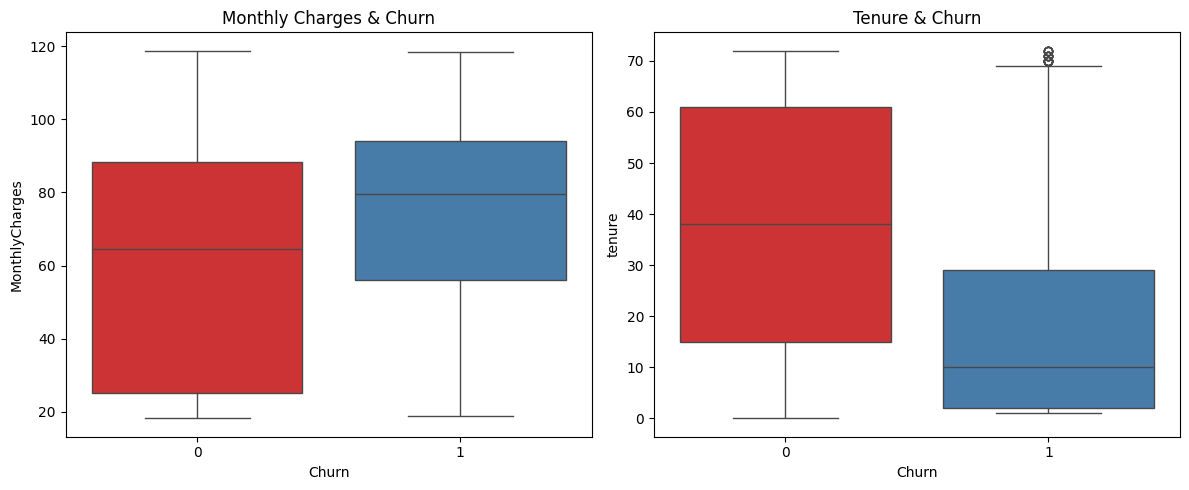

In [19]:
# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set1", ax=axes[0])
axes[0].set_title('Monthly Charges & Churn')

sns.boxplot(x='Churn', y='tenure', data=df, palette="Set1", ax=axes[1])
axes[1].set_title('Tenure & Churn')

plt.tight_layout()
plt.show()

# Monthly Charges & Churn

- Customers who churn (blue) generally have higher monthly charges compared to those who do not churn (red).

- The median monthly charge for churned customers is higher, suggesting cost might be a factor in churn.

- The interquartile range (IQR) is similar for both groups, indicating variability in charges.

# Tenure & Churn (Right Plot)

- Customers who churn have significantly lower tenure, with most churned users having less than 20 months of tenure.

- Long-tenured customers (above 40-50 months) rarely churn, indicating customer loyalty increases over time.

- There are some outliers in the churned group, but they do not significantly impact the trend.

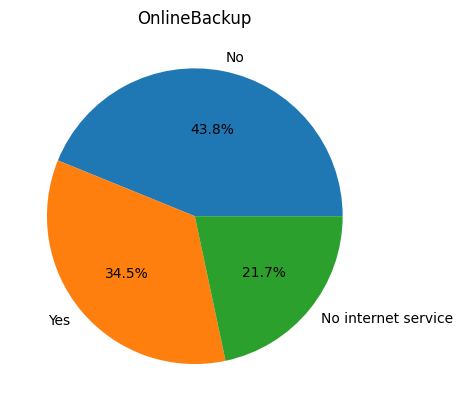

In [20]:
plt.pie(df['OnlineBackup'].value_counts(),labels=df['OnlineBackup'].value_counts().index, autopct='%1.1f%%')
plt.title("OnlineBackup")
plt.show()

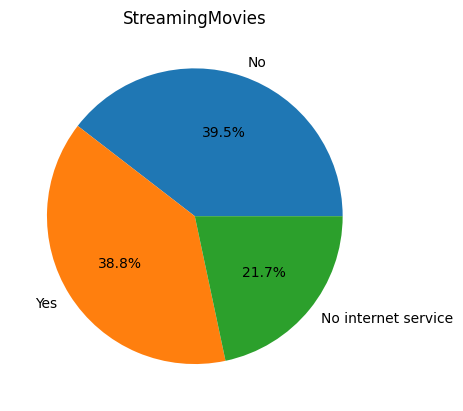

In [21]:
plt.pie(df['StreamingMovies'].value_counts(),labels=df['StreamingMovies'].value_counts().index, autopct='%1.1f%%')
plt.title("StreamingMovies")
plt.show()

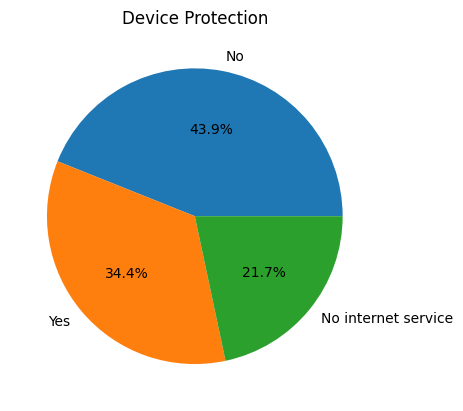

In [22]:
plt.pie(df['DeviceProtection'].value_counts(),labels=df['DeviceProtection'].value_counts().index, autopct='%1.1f%%')
plt.title("Device Protection")
plt.show()

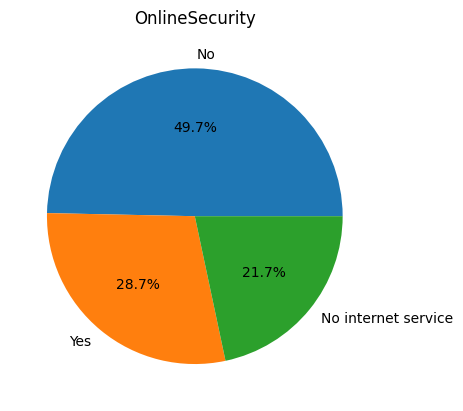

In [23]:
plt.pie(df['OnlineSecurity'].value_counts(),labels=df['OnlineSecurity'].value_counts().index, autopct='%1.1f%%')
plt.title("OnlineSecurity")
plt.show()

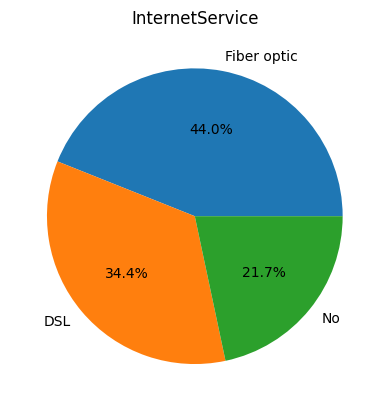

In [24]:
plt.pie(df['InternetService'].value_counts(),labels=df['InternetService'].value_counts().index, autopct='%1.1f%%')
plt.title("InternetService")
plt.show()

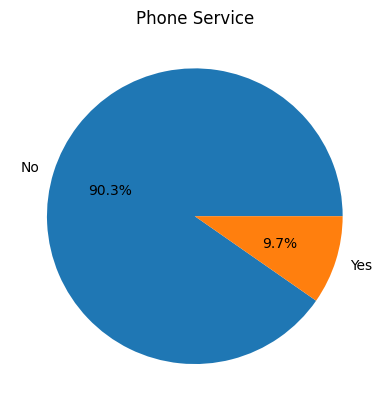

In [25]:
plt.pie(df['PhoneService'].value_counts(),labels=df['Dependents'].value_counts().index, autopct='%1.1f%%')
plt.title("Phone Service")
plt.show()

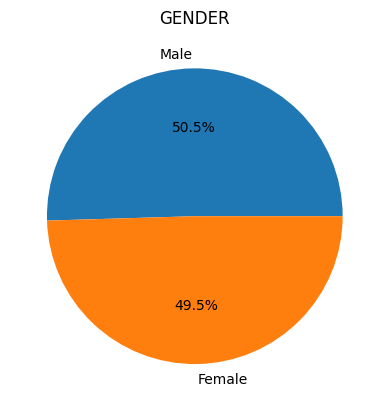

In [26]:
plt.pie(df['gender'].value_counts(),labels=df['gender'].value_counts().index, autopct='%1.1f%%')
plt.title("GENDER")
plt.show()

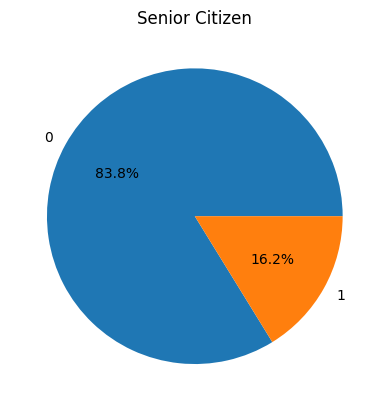

In [27]:
plt.pie(df['SeniorCitizen'].value_counts(),labels=df['SeniorCitizen'].value_counts().index, autopct='%1.1f%%')
plt.title("Senior Citizen")
plt.show()

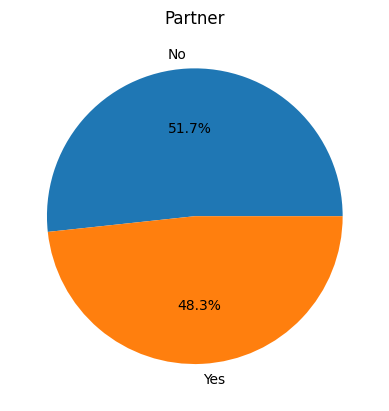

In [28]:
plt.pie(df['Partner'].value_counts(),labels=df['Partner'].value_counts().index, autopct='%1.1f%%')
plt.title("Partner")
plt.show()

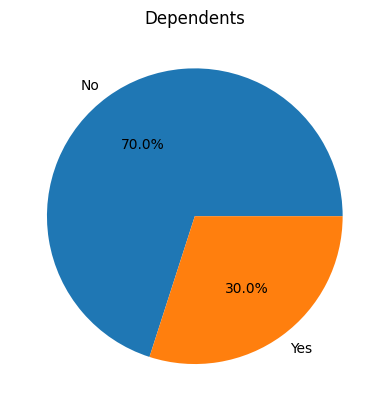

In [29]:
plt.pie(df['Dependents'].value_counts(),labels=df['Dependents'].value_counts().index, autopct='%1.1f%%')
plt.title("Dependents")
plt.show()

# Observations:

- **Customer Retention & Churn:** Many customers leave early, indicating possible issues with the initial experience, pricing, or service quality.

- **Plan Popularity:** A large portion of customers opt for low monthly charges, while some choose premium plans, leading to a wide spread in pricing.

- **Marketing Strategy:** Strategies should focus on retaining new customers (who leave early) and upselling services to those in mid-range charge categories.

In [30]:
df.tenure.nunique()

73

In [31]:
df['Dependents'].value_counts()

,count
Dependents,
No,4933
Yes,2110


In [32]:
for i in df.columns:
    print("******************************",i,"********************************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************** customerID ********************************************

{'8309-PPCED', '4554-YGZIH', '3282-ZISZV', '3419-SNJJD', '4893-GYUJU', '6347-DCUIK', '2592-HODOV', '4132-POCZS', '2055-BFOCC', '7609-YBPXG', '1134-YWTYF', '7321-PKUYW', '9441-QHEVC', '7120-RFMVS', '4324-AHJKS', '3212-KXOCR', '4900-MSOMT', '2164-SOQXL', '3934-HXCFZ', '7246-ZGQDF', '4510-PYUSH', '4633-MKHYU', '4988-IQIGL', '9795-VOWON', '2712-SYWAY', '7235-NXZCP', '2725-KXXWT', '0431-APWVY', '8800-ZKRFW', '0774-IFUVM', '1360-XFJMR', '7173-TETGO', '9730-DRTMJ', '9114-DPSIA', '1100-DDVRV', '9054-FOWNV', '2208-UGTGR', '1970-KKFWL', '4678-DVQEO', '4853-OITSN', '2139-FQHLM', '7566-DSRLQ', '1184-PJVDB', '5724-BIDBU', '9572-MTILT', '6080-LNESI', '9586-JGQKH', '8961-QDZZJ', '4094-NSEDU', '6549-YMFAW', '0212-ISBBF', '0666-UXTJO', '6963-KQYQB', '1750-CSKKM', '6619-RPLQZ', '3312-UUMZW', '8184-WMOFI', '6174-NRBTZ', '7850-VWJUU', '9766-HGEDE', '9327-QSDED', '5624-BQSSA', '8659-HDIYE', '3528-HFRIQ', '4611-ANLQC', '

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [35]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [36]:
df['TotalCharges'].mode()[0]

'20.2'

In [37]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mode())

In [38]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
df = df.drop('customerID', axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


***Data Preprocessing***

**One Hot Encoding**  for Categorical Variables

In [42]:
df = pd.get_dummies(df, columns=['gender','Partner','Dependents','PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity',
'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [43]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [44]:
df1 = df.applymap(lambda x : int(x) if isinstance(x, bool) else x)

In [45]:
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [46]:
x = df1.drop(columns=['Churn'])
y = df1['Churn']

In [47]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [48]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [49]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scalerd_cols = ['tenure','MonthlyCharges','TotalCharges']

x[scalerd_cols] = std.fit_transform(x[scalerd_cols])

In [50]:
x.isnull().sum()


,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,11
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0
MultipleLines_Yes,0


In [51]:
x['TotalCharges'] = x['TotalCharges'].fillna(x['TotalCharges'].mean())

In [52]:
x.isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0
MultipleLines_Yes,0


***Implementing the SMOTE Sampling method , since we have an imbalance in the dependent data***

In [53]:
import imblearn
from imblearn.over_sampling import SMOTE
smote  = SMOTE()

x_smote , y_smote = smote.fit_resample(x,y)

print(y.value_counts())
print()
print(y_smote.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64

Churn
0    5174
1    5174
Name: count, dtype: int64


***Splitting the data to train and test***

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=101)

***Data Profiling library will allow us do the variable Analysis, Missing Values, Correlations, Duplications and Interactions***

In [55]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.6/399.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6bb0c4bfcf444fca7beb9b6021d8469ad58ed6c1acb3936594877bff8d9d2e7e
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [56]:
import ydata_profiling
from ydata_profiling import ProfileReport
reports = ProfileReport(df)
reports.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 31/31 [00:00<00:00, 53.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
#Feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Feature Selection using Random Forest
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(x_train, y_train)

# Extract feature importances BEFORE transformation
feature_importances = pd.Series(rf_selector.feature_importances_, index=x_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Apply feature selection
selector = SelectFromModel(rf_selector, threshold='mean', prefit=True)
selected_features = x_train.columns[selector.get_support()]
X_train_selected = selector.transform(x_train)
X_test_selected = selector.transform(x_test)

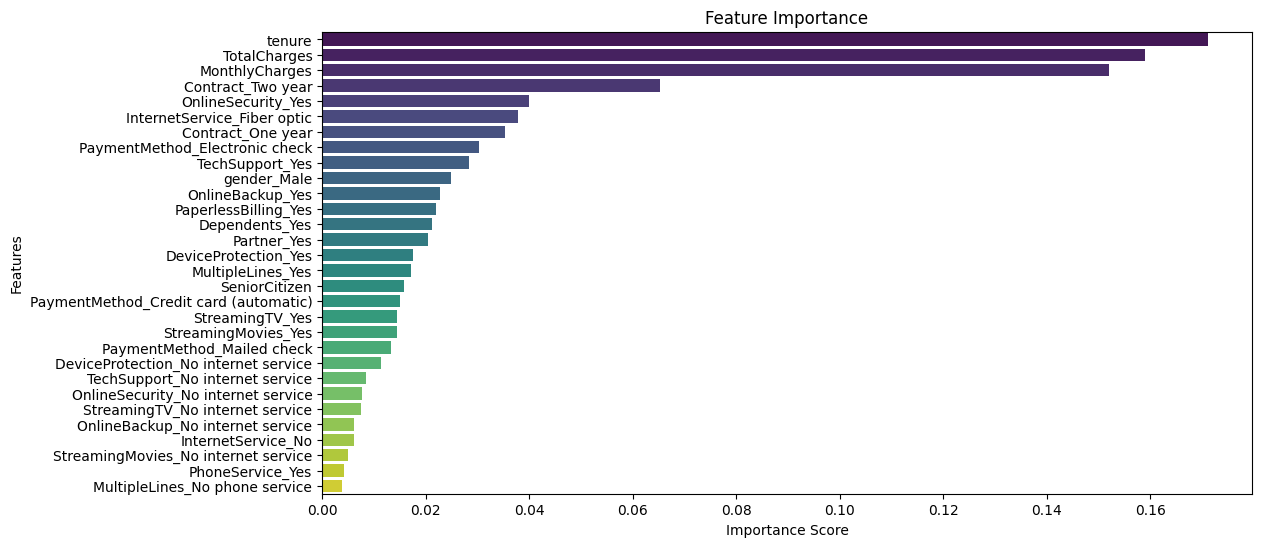

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

***Feature Selection in Random Forest , and we could see in the visuals which are important features here i used all colomns since there are very few features ( around 30)***

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score,confusion_matrix, roc_curve

In [60]:
rfc_model = RandomForestClassifier()
param_list = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}
cv_rfc=RandomizedSearchCV(rfc_model,cv=5,param_distributions=param_list,n_jobs=-1)
cv_rfc.fit(x_train,y_train)
print('The Best Parameters using GridSearch CV :\n',cv_rfc.best_params_)

The Best Parameters using GridSearch CV :
 {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [61]:
rfc=RandomForestClassifier(**cv_rfc.best_params_,random_state=42)
rfc.fit(x_train,y_train)
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)
rfc_train_accuracy=accuracy_score(rfc_train_pred,y_train)
rfc_test_accuracy=accuracy_score(rfc_test_pred,y_test)
print('Training Accuracy for Random Forest Classifier',rfc_train_accuracy)
print('Testing Accuracy for Random Forest Classifier',rfc_test_accuracy)
print(classification_report(rfc_test_pred,y_test))

Training Accuracy for Random Forest Classifier 0.8380505315477013
Testing Accuracy for Random Forest Classifier 0.814170692431562
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1415
           1       0.86      0.79      0.82      1690

    accuracy                           0.81      3105
   macro avg       0.81      0.82      0.81      3105
weighted avg       0.82      0.81      0.81      3105



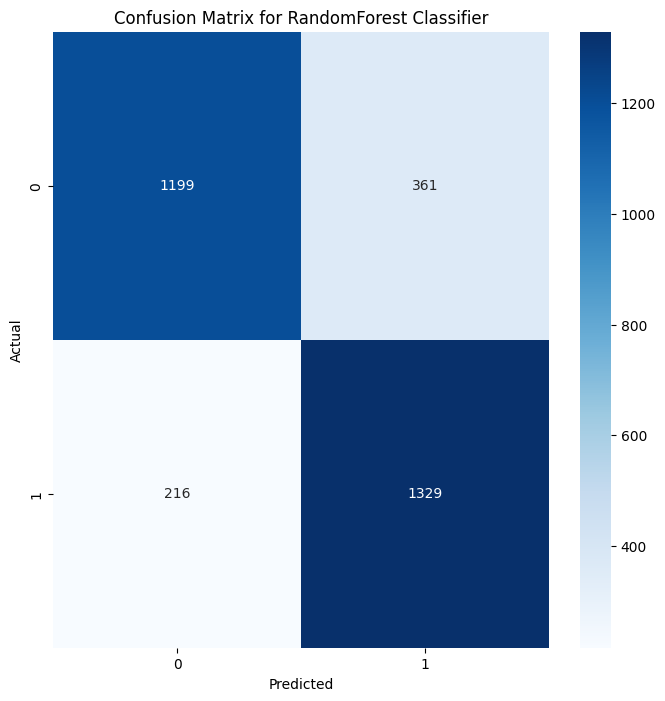

In [62]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,rfc_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForest Classifier')
plt.show()

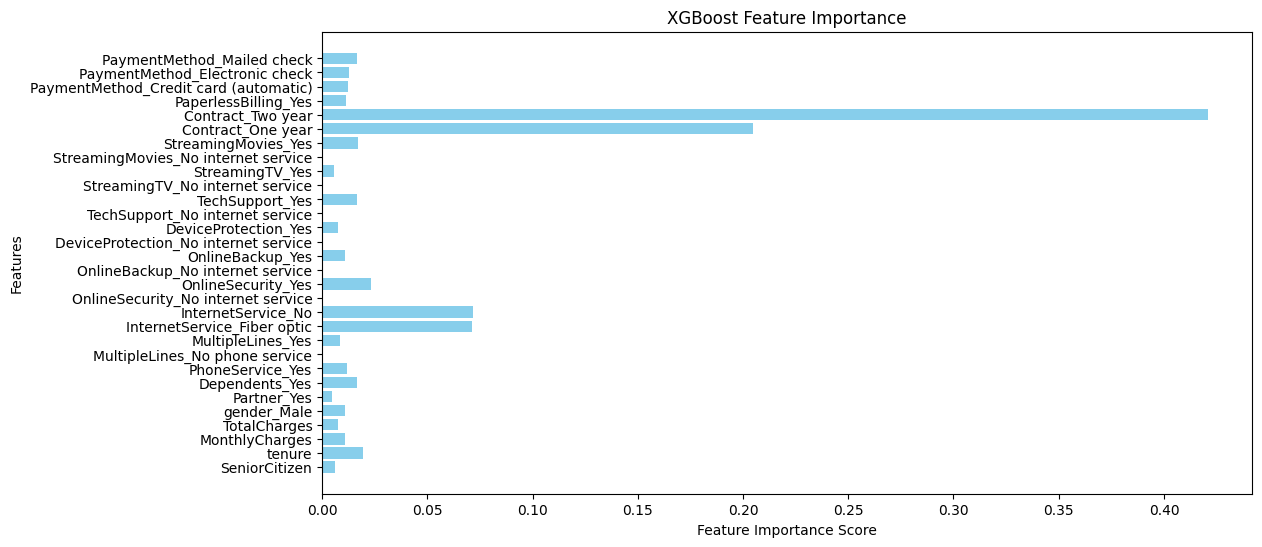

In [63]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

# 1. Train XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(x_train, y_train)

# 2. Feature Importance Calculation
xgb_importance = xgb_model.feature_importances_

# 3. Visualizing Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(x_train.columns, xgb_importance, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

***XGBoost have the different feature Importance Comapring Random Forest***

In [64]:
xgb_model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0])

In [65]:
xgb_modeltrain_pred=xgb_model.predict(x_train)
xgb_modeltest_pred=xgb_model.predict(x_test)
xgb_train_accuracy=accuracy_score(xgb_modeltrain_pred,y_train)
xgb_test_accuracy=accuracy_score(xgb_modeltest_pred,y_test)
print('Training Accuracy for Random Forest Classifier',xgb_train_accuracy)
print('Testing Accuracy for Random Forest Classifier',xgb_test_accuracy)
print(classification_report(xgb_modeltest_pred,y_test))

Training Accuracy for Random Forest Classifier 0.8504763219660362
Testing Accuracy for Random Forest Classifier 0.8219001610305958
              precision    recall  f1-score   support

           0       0.78      0.86      0.81      1413
           1       0.87      0.79      0.83      1692

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.83      0.82      0.82      3105



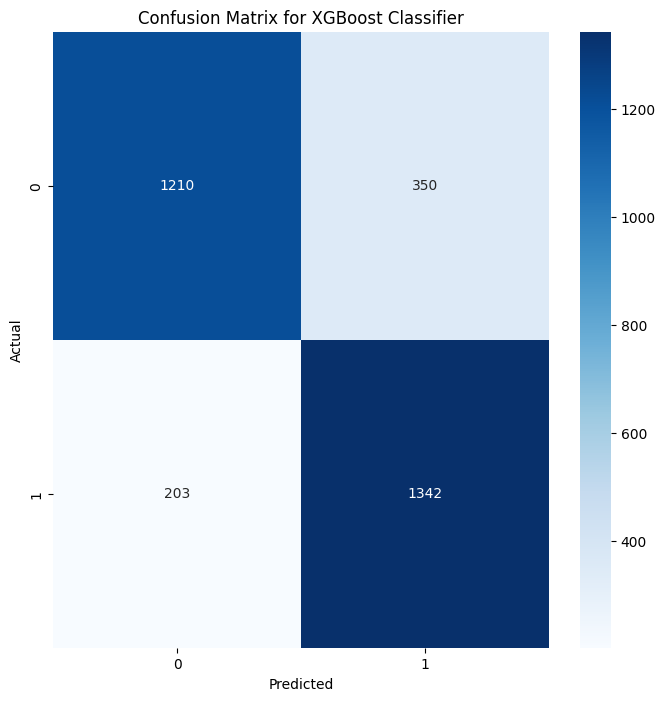

In [66]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,xgb_modeltest_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [67]:
#Logisstic regression

# Define Logistic Regression Model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Define Hyperparameter Grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 (Lasso) or L2 (Ridge)
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Predict on train & test sets
y1_train_pred = best_log_reg.predict(x_train)
y1_test_pred = best_log_reg.predict(x_test)


In [72]:
log_train_accuracy=accuracy_score(y1_train_pred,y_train)
log_test_accuracy=accuracy_score(y1_test_pred,y_test)
print('Training Accuracy for Random Forest Classifier',log_train_accuracy)
print('Testing Accuracy for Random Forest Classifier',log_test_accuracy)
print(classification_report(xgb_modeltest_pred,y_test))

Training Accuracy for Random Forest Classifier 0.8007731602926964
Testing Accuracy for Random Forest Classifier 0.8119162640901771
              precision    recall  f1-score   support

           0       0.78      0.86      0.81      1413
           1       0.87      0.79      0.83      1692

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.83      0.82      0.82      3105



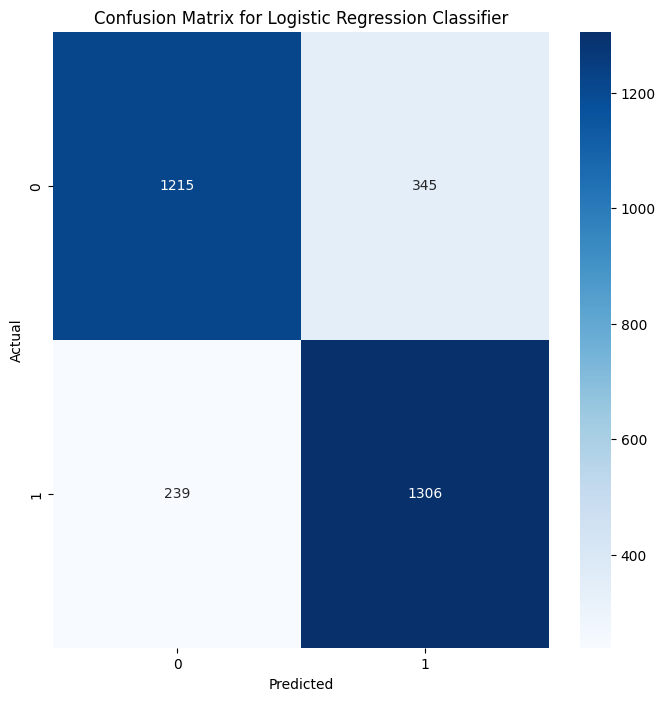

In [69]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,y1_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

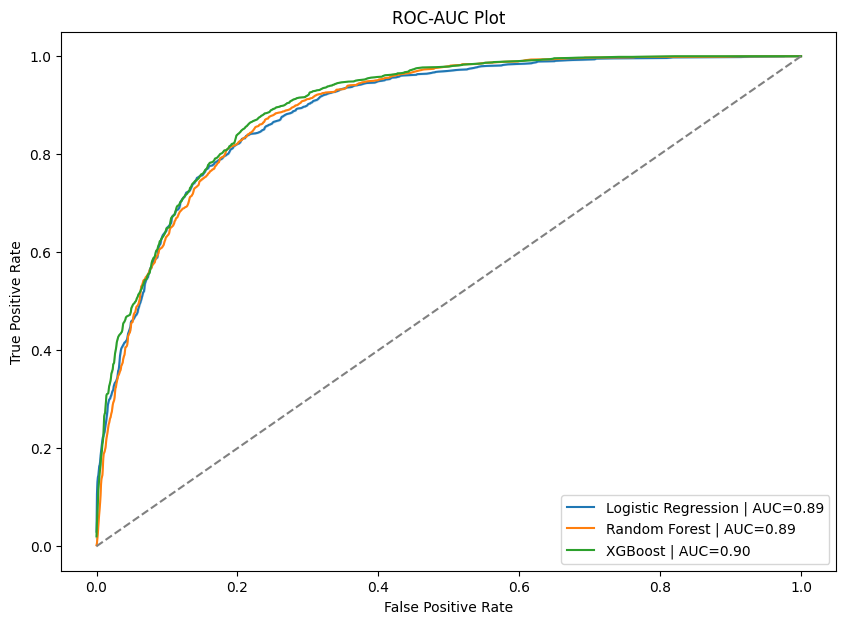

In [70]:
log_reg.fit(x_train, y_train)
rfc.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)

# Predict Probabilities
log_probs = log_reg.predict_proba(x_test)[:, 1]  # Logistic Regression
rfc_probs = rfc.predict_proba(x_test)[:, 1]  # Random Forest
xgb_probs = xgb_model.predict_proba(x_test)[:, 1]  # XGBoost

# Calculate AUC Scores
log_auc = roc_auc_score(y_test, log_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Compute ROC Curves
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Plot ROC Curve
plt.figure(figsize=(10, 7))
sns.lineplot(x=log_fpr, y=log_tpr, label=f'Logistic Regression | AUC={log_auc:.2f}')
sns.lineplot(x=rfc_fpr, y=rfc_tpr, label=f'Random Forest | AUC={rfc_auc:.2f}')
sns.lineplot(x=xgb_fpr, y=xgb_tpr, label=f'XGBoost | AUC={xgb_auc:.2f}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.title('ROC-AUC Plot')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


***The ROC Curve is greater than 50% for all the 3 Models so evaluation wise our model is performing well.***

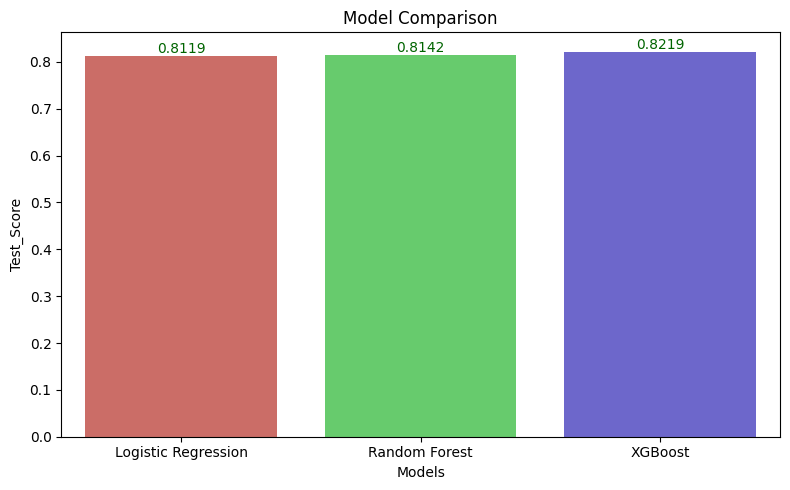

In [76]:
results = pd.DataFrame(data={'Models':['Logistic Regression','Random Forest','XGBoost'],
                             'Train_Score':[log_train_accuracy,rfc_train_accuracy,xgb_train_accuracy],
                             'Test_Score':[log_test_accuracy, rfc_test_accuracy, xgb_test_accuracy]})
plt.figure(figsize=(8,5))
ax=sns.barplot(x='Models',y='Test_Score',data=results,palette='hls')
plt.title('Model Comparison')
for rect in ax.patches:
      ax.text(rect.get_x()+rect.get_width()/2,rect.get_height(),f'{rect.get_height():.4f}',
            ha='center',va='bottom',color='darkgreen')
plt.tight_layout()
plt.show()